In [1]:
from numpy import *
from pylab import plt
from natural_constants import *

### Physical Constants

In [2]:
T0 = u_T0
Sc = solar_const

### Stefan-Boltzmann Law

In [3]:
def SB_P(T):
    """P(T)"""
    return SB * T**4

def SB_T(P):
    """T(P)"""
    T2 = sqrt(P/SB)
    T4 = sqrt(T2)
    return T4

### Earth Data

In [4]:
RE = earth_radius
AE = 4.0 * pi * RE**2     # m^2     earth surface
AC = pi * RE**2           # m^2     earth cross section
a  = 0.3                  #         aerth albedo

#### Mean power per m², that has to be radiated to space

In [5]:
P_0 = AC/AE * Sc * (1.0 - a)

print("P_0 = {:.2e}".format((P_0).to("W/m**2")))

P_0 = 2.39e+02 watt / meter ** 2


#### Mean Surface Temperature
Without green house effect the mean surface temperature would be:

$T_0 = (P_0/σ)^{(1/4)}$

In [6]:
T_0 = (P_0/u_σ)**(1/4)
print("T_0 = {:.2e}".format((T_0).to("K")))

T_0 = 2.55e+02 kelvin


#### Assumption

Part b of the surface A is at temperature $T_h$ and the rest of the surface (1-b) at $T_l$

In [7]:
b = 0.25

If all the power is emitted from the part b the temperature $T_{max}$ has to be:

In [8]:
I_max = AC/(b*AE) * Sc * (1.0 - a)
T_max = (I_max/u_σ)**(1/4)
print("I_max = {:.2e}".format((I_max).to("W/m**2")))
print("T_max = {:.2e}".format((T_max).to("K")))

I_max = 9.57e+02 watt / meter ** 2
T_max = 3.60e+02 kelvin


In [9]:
I_max

956.9 <Unit('watt / meter ** 2')>

The temperature $T_h$ of the hotter part of the surface is assumed to be in the range $[T_0, T_{max}]$ :

In [10]:
T_h  = mgrid[T_0:T_max:200j]

The power emitted by the hot part is:

In [11]:
P_h  = u_σ * T_h**4 * b

Power that has to emitted by the lower temperature part of the earth's surface:

In [12]:
P_l  = P_0 - P_h
P_l  = where(P_l >= 0.0, P_l, 0.0)

The lower temperature $T_l$ is:

In [13]:
T_l  = (P_l/u_σ/(1-b))**(1/4)  

the power $P_h$ radiated by the hotter part:

In [14]:
P_h  = u_σ * T_h**4 * (1-b)

The mean temperature is given by:

In [15]:
T_m = T_h * b + T_l* (1-b)

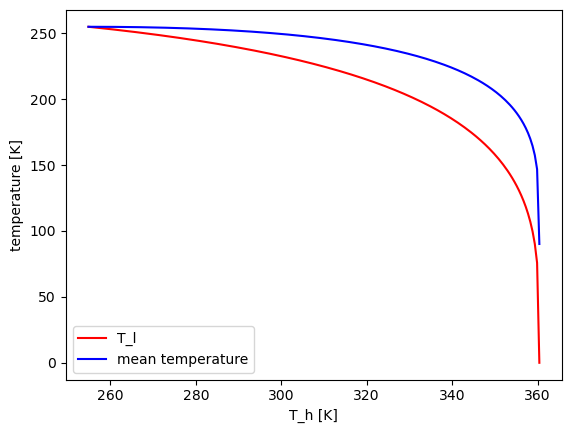

In [16]:
plt.plot(val(T_h), val(T_l), 'r', label="T_l")
plt.plot(val(T_h), val(T_m), 'b', label="mean temperature")
plt.xlabel("T_h [K]")
plt.ylabel("temperature [K]")
plt.legend(loc = 'best')

The result shows that the mean temperature is highest when the temperature is asumed to be homogeneously distributed over the earth's surface.

## Mean Temperature

The mean surface temperature is determined to be $T_{earth} = 288 K$. The power per $m^2$ radiated by a surface at $T_{earth}$ is according to the Stefan-Boltzmann law: 

In [17]:
T_earth = 288.0 * u.K
P_rad = u_σ * T_earth**4
print("P_rad = {:.2e}".format((P_rad).to("W/m**2")))

P_rad = 3.90e+02 watt / meter ** 2


The power that is blocked by the atmosphere is then given by $P_{blocked} = P_{rad} - P_0$: 

In [18]:
P_blocked = P_rad - P_0
print("P_blocked = {:.2e}".format((P_blocked).to("W/m**2")))

P_blocked = 1.51e+02 watt / meter ** 2
